In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
def bedtopo(L,*args):  #bed to topography L- length of glacier
    b0 = args[0]   #b0: glacier start point
    bx = args[1]   #bx: glacier slope
    sillmin = args[2]   #start of reverse slope
    sillmax = args[3]   #end of reverse slope
    sillslope = args[4]   #slope of reverse slope
    
    if L < sillmin: #if glacier is shorter than reverse slope
        b = b0 + bx*L
    elif L < sillmax: #if glacier terminates on reverse slope
        b = b0 + bx*sillmin + sillslope*(L-sillmin)
    else: #if glacier terminates after reverse slope
        b = b0 + bx*sillmin + sillslope*(sillmax-sillmin) + bx*(L-sillmax)
        
    return b

In [24]:
data = pd.read_csv("data_single_cases_analysis/projections/smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv").set_index("t")

In [25]:
dataHL = data[["aH","aL"]].loc[[(2020+i/4) for i in range(4*280+1)]]

In [29]:
Q_data = pd.DataFrame(columns=["Q","Q_g"])
for ind,row in dataHL.iterrows():
    Hnd = row['aH']
    Lnd = row['aL']
    b0 = 0
    bx = -0.001
    sillmin = 415e3
    sillmax = 425e3
    sillslope = 0.01
    rhow = 1028   #density of water
    rhoi = 917   #denisty of ice
    n = 3   
    beta = 4.75 
    Lscale = 100e3   #scale for length, it is on the order of 10E4 or 1E5
    Hscale = 1000  #scale for thickness, it is on the order of 10E2 or 1E3
    gamma = 0.05
    omega = 8e-8
    
    H = Hnd*Hscale #icethickness
    L = Lnd*Lscale #length of glacier

    #see below for write out of the functions in mathematical notation
    hg = -(rhow/rhoi)*bedtopo(L,b0,bx,sillmin,sillmax,sillslope)   # #1
    Q = gamma * (H**(2*n + 1))/(L**n)   # #2
    Qg = omega * ((hg)**beta)   # #3
    Q_data = Q_data.append({'t':ind,'Q': Q,'Q_g': Qg}, ignore_index=True)
    

<AxesSubplot:>

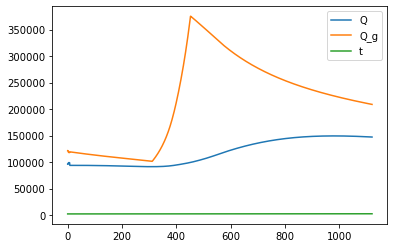

In [30]:
Q_data.plot()

In [82]:
vol_data = pd.DataFrame(columns=["V"])
W = 500*1e3
for ind,row in Q_data.iterrows():
    Q = row["Q"]
    Qg = row["Q_g"]
    dV = W*(Q-Qg)
    V = 0.25*np.abs(dV)
    vol_data = vol_data.append({'t':ind,'V':V}, ignore_index=True)

<AxesSubplot:>

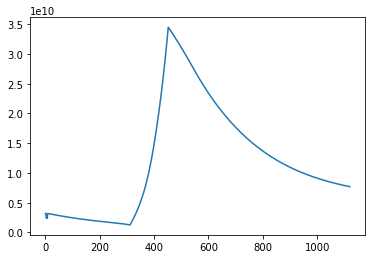

In [83]:
vol_data['V'].plot()

<AxesSubplot:>

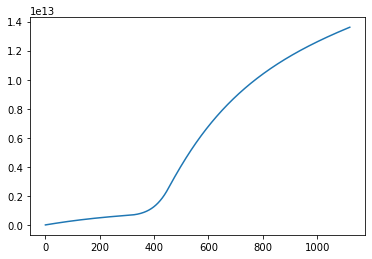

In [84]:
vol_data['sum'] = vol_data['V'].cumsum()
vol_data['sum'].plot()

<AxesSubplot:>

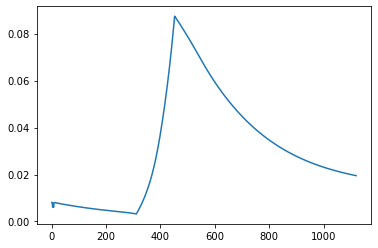

In [85]:
vol_data["sea_level"] = (vol_data['V']*1e-9)/(394.67)
vol_data['sea_level'].plot()

<AxesSubplot:>

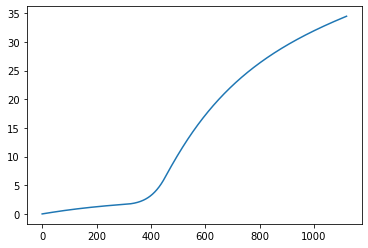

In [86]:
vol_data['sea_level_cumulative'] = vol_data['sea_level'].cumsum()
vol_data['sea_level_cumulative'].plot()

In [81]:
#creates first and second data frame to save with
dft=pd.DataFrame(t.T, columns=['t'])
df=pd.DataFrame(uTrue.T, columns=['H','L'])
#add all the ensemble cases
for m in range(uae.shape[1]):
    df[f"{m+1}H"]=uae[0,m,:]
    df[f"{m+1}L"]=uae[1,m,:]
#add the mean analysis
dfa=pd.DataFrame(ua.T, columns=['aH','aL'])
#combine arrays into a single one
data1=df.join(dft)
data2=data1.join(dfa)
#set index of new array to time
data=data2.set_index('t')
#save data
data.to_csv(f"data_single_cases_analysis/projections/smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv")
#undergoes same process to save observations into a csv
dobst=pd.DataFrame(t[ind_m].T, columns=['t'])
dobs=pd.DataFrame(w.T, columns=['H','L'])
dataobs1=dobs.join(dobst)
dataobs=dataobs1.set_index("t")
dataobs.to_csv(f"data_single_cases_analysis/projections/obs_smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv")

NameError: name 't' is not defined